In [11]:
from scipy.ndimage import rotate
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from PIL import Image

In [3]:
img_dir = "KIMIA dataset"
img_paths = []

for filename in os.listdir(img_dir):
    if filename.endswith(".png"):
        img_path = os.path.join(img_dir, filename)
        img_paths.append(img_path)

In [4]:
num_images = len(img_paths)

### Template Image

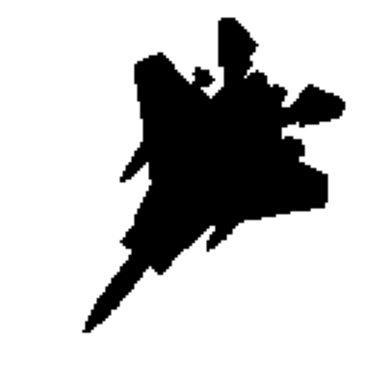

In [5]:
temp = cv2.imread('./KIMIA dataset/f15.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(temp,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
def calculate_angle(image):
    X = np.array([np.where(image==0)])
    X = (X.reshape(X.shape[1], X.shape[2])).T
    
    pca = PCA(n_components=2)
    pca.fit(X)
    angle = np.arctan2(pca.components_[0][1], pca.components_[0][0])
    angle *= 180 / np.pi
         
    return angle

In [7]:
angle = calculate_angle(temp)
print('Angle of the template image : ', angle)

Angle of the template image :  -36.18640237578001


In [8]:
# reference from GPT
def create_image_montage(images, num_cols=20, scale_factor=2):
    max_height = max(img.shape[0] for img in images)
    max_width = max(img.shape[1] for img in images)

    max_height *= scale_factor
    max_width *= scale_factor

    num_images = len(images)
    num_rows = int(np.ceil(num_images / num_cols))
    montage = np.zeros((num_rows * max_height, num_cols * max_width), dtype=np.uint8)

    for i, img in enumerate(images):
        row = i // num_cols
        col = i % num_cols
        resized_img = cv2.resize(img, (max_width, max_height))
        montage[row * max_height:(row + 1) * max_height, col * max_width:(col + 1) * max_width] = resized_img

    return montage

-36.18640237578001


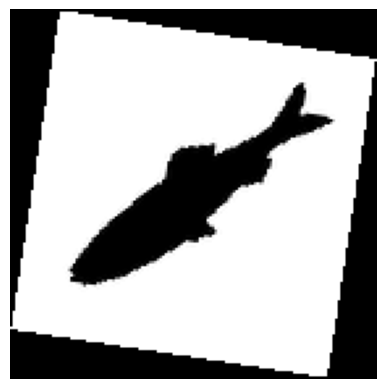

-36.18640237578001


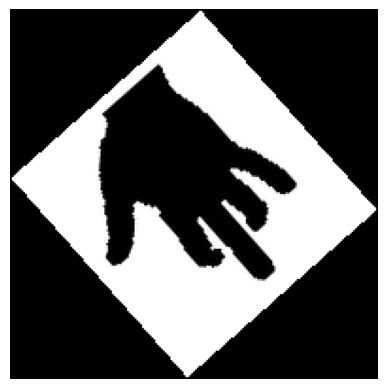

-36.18640237578001


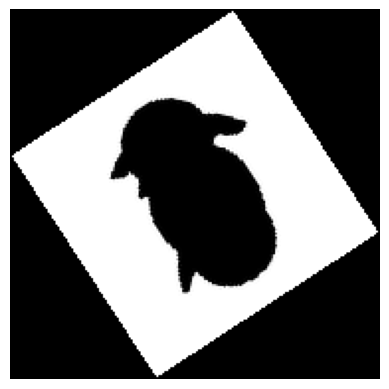

-36.18640237578001


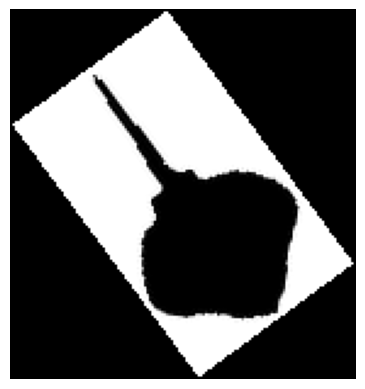

-36.18640237578001


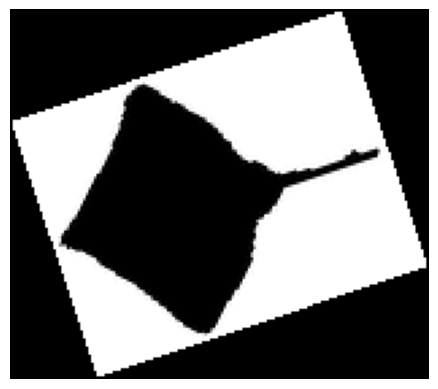

In [13]:
for path in img_paths[: 5]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    curr_image_angle = calculate_angle(img)
    diff = curr_image_angle - angle
    
    height, width = img.shape
    rotated_img = rotate(img, diff)
    
    print(angle)
    plt.imshow(rotated_img, cmap='gray')
    plt.axis('off')
    plt.show()

### Image Montage

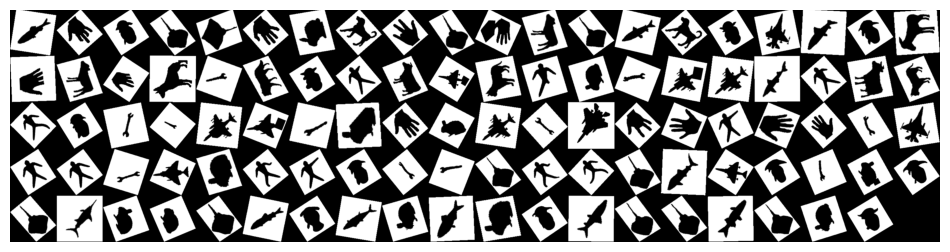

In [18]:
rotated_images = []
for path in img_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    curr_image_angle = calculate_angle(img)
    diff = curr_image_angle - angle
    
    height, width = img.shape
    rotated_img = rotate(img, diff)
    rotated_images.append(rotated_img)

montage = create_image_montage(rotated_images, scale_factor=3)
plt.figure(figsize=(12, 12))
plt.imshow(montage, cmap='gray')
plt.axis('off')
plt.show()

### Algorithm Flowchart

**Initialization:** Begin by initializing variables and lists to store image paths and rotated images.

**PCA:** PCA is performed on the template image to isolate the object and align it with the original axes.

**Calculating Orientation:** For each image in the dataset, the orientation angle is calculated with respect to the original axes. This is the slope of the PCA result.

**Changing Orientation:** For each image in the dataset, the rotation equivalent to the difference between the current image and the template image is applied.